In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [5]:
dataset.head()

,Age,Age Group,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,36-45,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,49,46-55,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,37,36-45,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,33,26-35,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,27,26-35,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Age Group                 1470 non-null   object
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [7]:
print(dataset['Attrition'].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [8]:
dataset.dtypes

Age                          int64
Age Group                   object
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
Salary Slab                 object
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours       

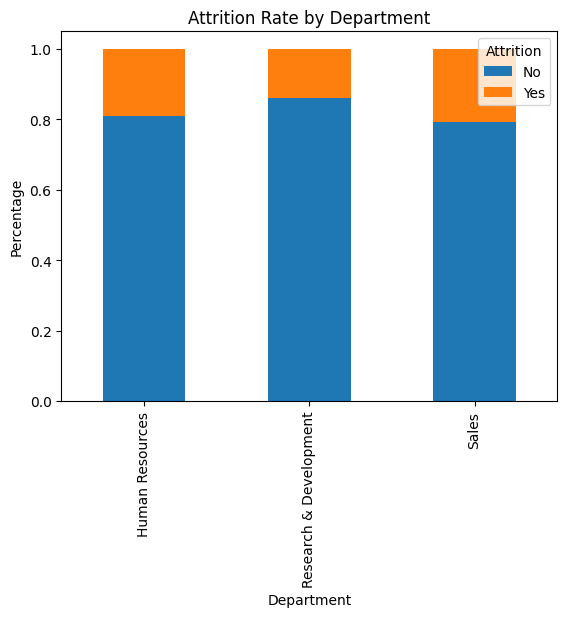

In [9]:
dept_attrition = dataset.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()
dept_attrition.plot(kind='bar', stacked=True)
plt.title('Attrition Rate by Department')
plt.ylabel('Percentage')
plt.show()

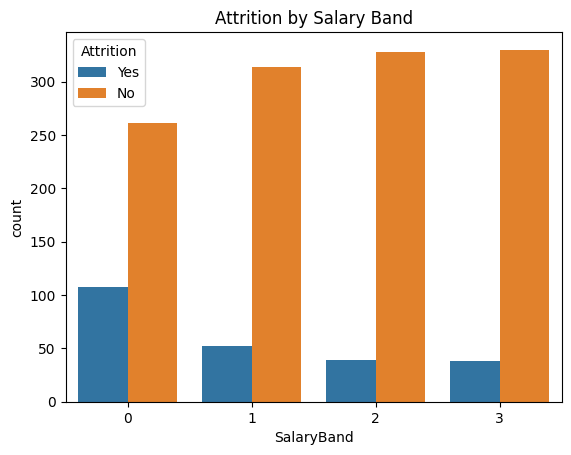

In [14]:
dataset['SalaryBand'] = pd.qcut(dataset['MonthlyIncome'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
salaryband_mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
dataset['SalaryBand'] = dataset['SalaryBand'].map(salaryband_mapping)
sns.countplot(x='SalaryBand', hue='Attrition', data=dataset)
plt.title('Attrition by Salary Band')
plt.show()

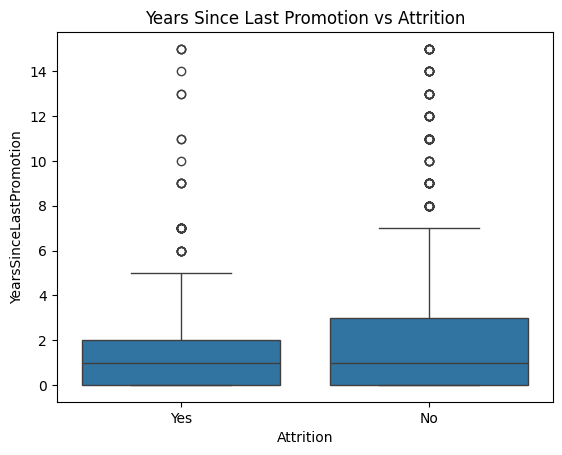

In [15]:
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=dataset)
plt.title('Years Since Last Promotion vs Attrition')
plt.show()

<Axes: xlabel='Attrition', ylabel='count'>

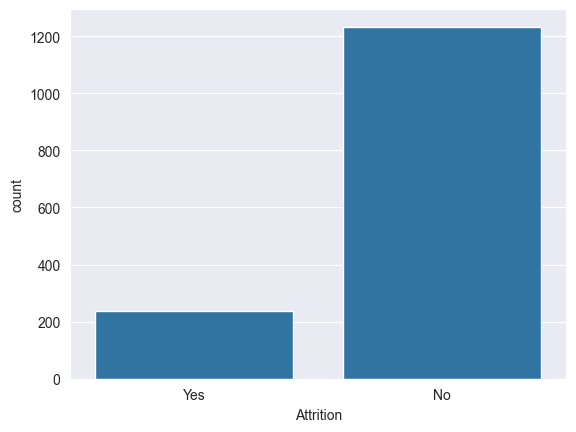

In [16]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition',
              data = dataset)

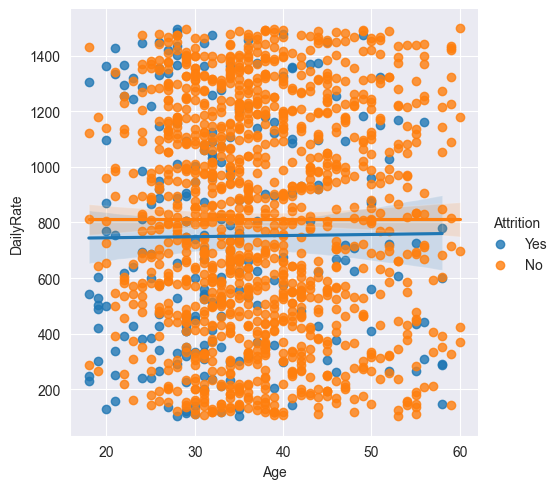

In [17]:
sns.lmplot(x = 'Age',
           y = 'DailyRate', 
           hue = 'Attrition', 
           data = dataset)

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

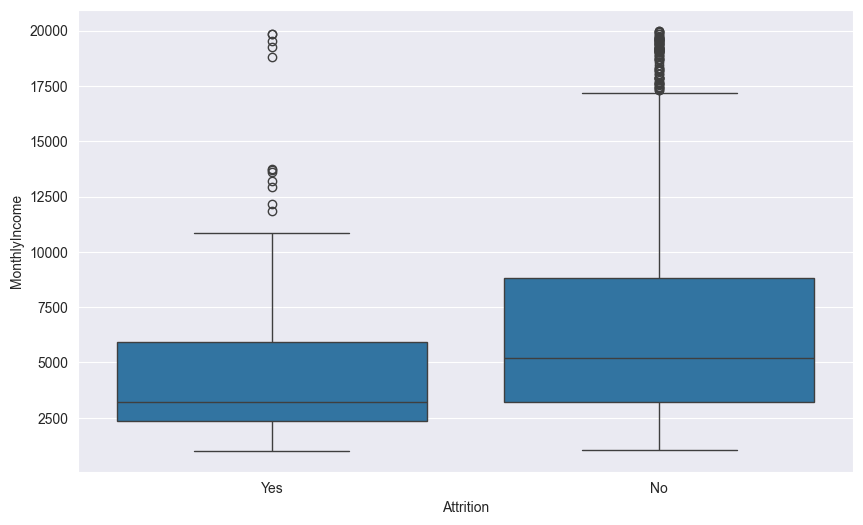

In [18]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome', 
            x ='Attrition', 
            data = dataset)